In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [0]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [6]:
from numpy import *
import matplotlib.pylab as plt

# 解析数据
def loadDataSet(file_name):
    dataMat = []
    labelMat = []
    fr = open(file_name)
    for line in fr.readlines():
        curLine = line.strip().split()
        dataMat.append([1.0,float(curLine[0]),float(curLine[1])])
        labelMat.append(int(curLine[2]))
    return dataMat, labelMat

In [7]:
def sigmoid(inX):
    return  1.0 / (1 + exp(-inX))

In [12]:
def stocGradAscent1(dataMatrix, classLabels, numIter=500):
    m,n = shape(dataMatrix)
    weights = ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    alpha = 0.001
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = range(m)
        for i in range(m):
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[dataIndex[randIndex]]*weights))
            error = classLabels[dataIndex[randIndex]] - h
            weights = weights + alpha * error * dataMatrix[dataIndex[randIndex]]
            # del(dataIndex[randIndex])
    return weights

In [13]:
def plotBestFit(dataArr, labelMat, weights):


    n = shape(dataArr)[0]
    xcord1 = [];
    ycord1 = []
    xcord2 = [];
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]);
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]);
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)

    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X');
    plt.ylabel('Y')
    plt.show()

In [14]:
def testLR():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet("data/data2.txt")
    dataArr = array(dataMat)
    # print dataArr
    weights = stocGradAscent1(dataArr, labelMat)
    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)

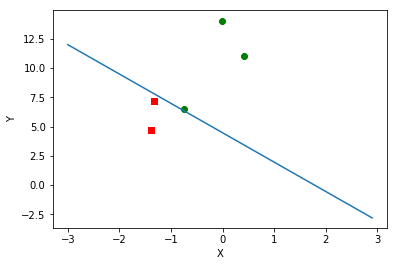

In [15]:
if __name__ == '__main__':
    testLR()